# Choropleth maps

files needed = ('cb_2018_us_state_5m.shp', 'cb_2018_us_county_5m.shp', 'results.csv')

We have figured out how to plot geographic data using geopandas. We needed shape files loaded into geoDataFrames with one column assigned as the geoDataFrame's geometry. Once that is set up, plotting is easy. 

In this notebook we are going to learn how to assign colors to maps based on a variable &mdash; a *chloropeth*. We looked at an example of this kind of figure on the first day of class: [Voting patterns in Wisconsin](https://www.nytimes.com/elections/2016/results/wisconsin). By the end of this workbook, we will have made a similar map. 

In [1]:
import pandas as pd                         # pandas for data management
import geopandas                            # geopandas for maps work
from shapely.geometry import Point          # shapely handles the coordinate references for plotting shapes
import matplotlib.pyplot as plt             # matplotlib for plotting details

## Choropeth maps

A choropeth map is one with regions assigned colors based on a variable. 
* 'column' is the column name that holds the variable to color by
* 'cmap' is the color scheme. There are [many](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html)

Let's return to the South American map from the Maps I notebook.  

In [2]:
# geopandas comes with some datasets that define maps. 
# Here, we grab a low-resolution Natural Earth map and load it into a GeoDataFrame.
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world.sample(5)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
98,1281935911,Asia,India,IND,8721000.0,"POLYGON ((97.32711 28.26158, 97.40256 27.88254..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
46,2990561,North America,Jamaica,JAM,25390.0,"POLYGON ((-77.56960 18.49053, -76.89662 18.400..."
135,647581,Oceania,Solomon Is.,SLB,1198.0,"MULTIPOLYGON (((162.11902 -10.48272, 162.39865..."
143,64769452,Europe,United Kingdom,GBR,2788000.0,"MULTIPOLYGON (((-6.19788 53.86757, -6.95373 54..."


The dataset includes measures of population and GDP. Let's create a map where the color of each country depends on GDP per capita. 

In [3]:
world['gdp_cap'] = world['gdp_md_est']/world['pop_est']
world['gdp_cap'].describe()

count    177.000000
mean       0.021270
std        0.027499
min        0.000570
25%        0.003866
50%        0.011620
75%        0.027474
max        0.200000
Name: gdp_cap, dtype: float64

These numbers don't make much sense. There must be a scaling issue. This is why we always do sanity checks. Do the data look like we expect?

The GDP data are in millions (US GDP is on the order of trillions). The population data are not adjusted. (US population is around 330 million).

In [4]:
print('{0:,}'.format(float(world[world['iso_a3']=='USA']['gdp_md_est'])))

18,560,000.0


In [5]:
print('{0:,}'.format(float(world[world['iso_a3']=='USA']['pop_est'])))

326,625,791.0


In [6]:
world['gdp_cap'] = world['gdp_md_est']/world['pop_est']*1000000
print('US GDP per capita is {0:,.0f}'.format(float(world[world['iso_a3']=='USA']['gdp_cap'])))

US GDP per capita is 56,823


That looks better. Let's check it out once more. 

In [7]:
world.sort_values('gdp_cap', ascending=False)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,gdp_cap
159,4050,Antarctica,Antarctica,ATA,810.0,"MULTIPOLYGON (((-48.66062 -78.04702, -48.15140...",200000.000000
85,2314307,Asia,Qatar,QAT,334500.0,"POLYGON ((50.81011 24.75474, 50.74391 25.48242...",144535.707665
23,140,Seven seas (open ocean),Fr. S. Antarctic Lands,ATF,16.0,"POLYGON ((68.93500 -48.62500, 69.58000 -48.940...",114285.714286
84,6072475,Asia,United Arab Emirates,ARE,667200.0,"POLYGON ((51.57952 24.24550, 51.75744 24.29407...",109872.827801
86,2875422,Asia,Kuwait,KWT,301100.0,"POLYGON ((47.97452 29.97582, 48.18319 29.53448...",104715.064432
...,...,...,...,...,...,...,...
63,4689021,Africa,Liberia,LBR,3881.0,"POLYGON ((-8.43930 7.68604, -8.48545 7.39521, ...",827.678102
11,83301151,Africa,Dem. Rep. Congo,COD,66010.0,"POLYGON ((29.34000 -4.49998, 29.51999 -5.41998...",792.426025
75,11466756,Africa,Burundi,BDI,7892.0,"POLYGON ((30.46967 -2.41385, 30.52766 -2.80762...",688.250452
12,7531386,Africa,Somalia,SOM,4719.0,"POLYGON ((41.58513 -1.68325, 40.99300 -0.85829...",626.577897


The data for small places is crazy. Antarctica's GDP per capita doesn't really make sense. Let's only plot countries with populations greater than 50,000. I'm sorry to do this to you, Falkland Islands. 

In [8]:
world[world['pop_est']<50000]

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,gdp_cap
20,2931,South America,Falkland Is.,FLK,281.8,"POLYGON ((-61.20000 -51.85000, -60.00000 -51.2...",96144.660525
23,140,Seven seas (open ocean),Fr. S. Antarctic Lands,ATF,16.0,"POLYGON ((68.93500 -48.62500, 69.58000 -48.940...",114285.714286
159,4050,Antarctica,Antarctica,ATA,810.0,"MULTIPOLYGON (((-48.66062 -78.04702, -48.15140...",200000.000000


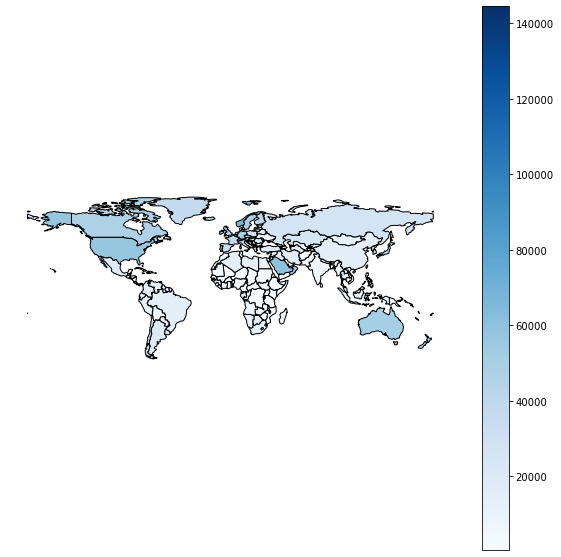

In [9]:
fig, gax = plt.subplots(figsize=(10,10))

world[world['pop_est']>50000].plot(ax = gax, column='gdp_cap', edgecolor='black', cmap = 'Blues', legend=True)

plt.axis('off')

plt.show()

That legend is atrocious. Never trust the defaults. Unfortunately, we are going to have to dig into the guts of matplotlib to fix it. It's a good thing we are already experienced with matplotlib. 

We are going to add a separate axis to our plot. Then we will tell the geopandas plot command to add the legend to the new axis. 

In [10]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

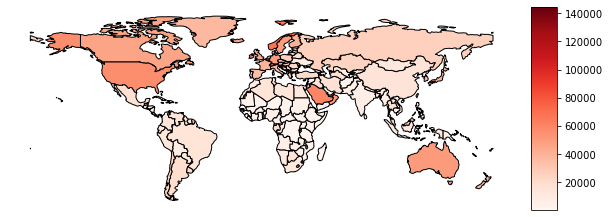

In [11]:
fig, gax = plt.subplots(figsize=(10,10))

# Adapted from https://geopandas.org/mapping.html
# https://matplotlib.org/3.1.1/gallery/axes_grid1/demo_colorbar_with_axes_divider.html

# Create an axis divider object
divider = make_axes_locatable(gax)

# Add a second axis to the right of the original axes. 
# Make the new axes 5% of the original and add some padding between them.
legend_ax = divider.append_axes('right', size='5%', pad=0.1)


world[world['pop_est']>50000].plot(
                                   ax = gax, column='gdp_cap',           # ax is the main axes
                                   edgecolor='black', cmap = 'Reds', 
                                   legend=True, cax=legend_ax)           # cax is the legend axes
                                   
                                                
# Here I ony turn off the axis of the main plot
gax.axis('off')

plt.show()

You can experiment with different padding, widths, locations, and color maps. 

## Practice

At the end of the Maps I notebook we created a map of Wisconsin's counties. We learned not only how to plot shape files, but where to find the shape files. The code below reproduces the map we finished with. 

C:\ProgramData\Anaconda3\lib\site-packages\pyproj\crs\crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


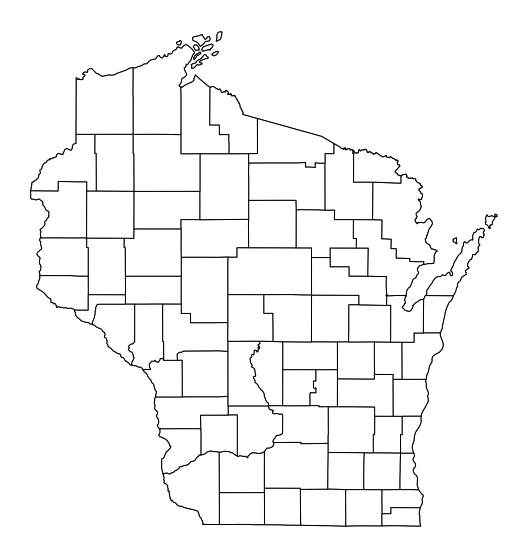

In [18]:
states = geopandas.read_file('cb_2018_us_state_5m/cb_2018_us_state_5m.shp')
counties = geopandas.read_file('cb_2018_us_county_5m/cb_2018_us_county_5m.shp')

# WI fips code is 55. 
wi_counties = counties[counties['STATEFP']=='55']

# Change the projection to Mercador
states=states.to_crs({'init': 'epsg:3395'})
wi_counties = wi_counties.to_crs({'init': 'epsg:3395'}) 

fig, gax = plt.subplots(figsize=(10,10))

# Plot the state outline
states[states['NAME'] == 'Wisconsin'].plot(ax = gax, edgecolor='black',color='white')

# Plot the counties
wi_counties.plot(ax=gax, edgecolor='black', color = 'white')

plt.axis('off')

plt.show()

Now let's color the map to reflect voting patterns in the 2016 presidential election. 

The steps:

1. Plot the state border
2. Plot the county borders
3. Merge data on votes with geographical data
4. Color the map

We have already figured out the first two steps. 


### 3. Get the vote totals and merge them 

Time to add the voter totals. I downloaded the results from https://elections.wi.gov/elections-voting/results/2016/fall-general. Go ahead and open up the file. It's a mess! 

I saved a cleaned up version of the file to 'results.csv' which we can use to save the hassle with cleaning the data. For fun, you should load the raw data and try beating it into shape. That's what you normally would have to do...and, it's fun.

**3(a).**  Load 'results.csv' to a DataFrame named `results`. Note, this is not a GeoDataFrame, this data doesn't have a geometery to it, it just has county names and vote counts. Use the `thousands=','` parameter to read_csv(). 

The county names in the map data are in title case. The county names in the vote data are in all caps. We know how to fix this up. 

**3(b).** Convert the county names in `results` to title case. 

**3(c)** Strip the whitespace out of the county names in `results`, too. (Trust me, there is some extra space in some of the county names...) Try `str.strip`.

**3(d).** Strip any whitespace from the NAME variable in the `wi_counties` GeoDataFrame. 
**3(e).** Convert the NAME variable to title case in the `wi_counties` GeoDataFrame.

**3(e).** Merge `wi_counties` and `results`. 

**3(f).** Create a variable called 'trump_share' that is the share of trump votes out of the total vote count.

### 4. Color the map

Create a chloropeth map with colors that correspond to Trump's share of the vote. 

Remember the extra arguments.

1. `column` is set to the column name of the data we want to be 'colored'
2. `cmap` determines the color scheme. I am using red colors.
3. `legend` turn on the legend


Are we missing data for Dane county? For Menominee county? Or, are they *really* democratic?

5. Print out, in a full sentence, the share of votes for Trump in Dane and Menominee counties. Express the shares with 3 decimal places.